<a href="https://colab.research.google.com/github/MAristyaP/PCVK_Genap_2021/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Make an image histogram like the following histogram output based on the flowchart below :
(Use image lena.jpg)

<BarContainer object of 256 artists>

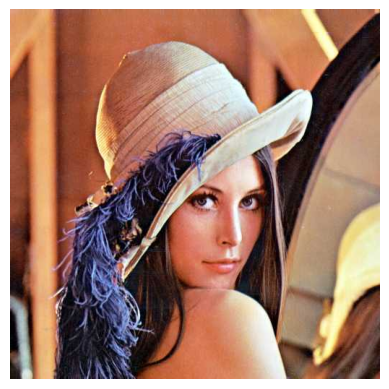

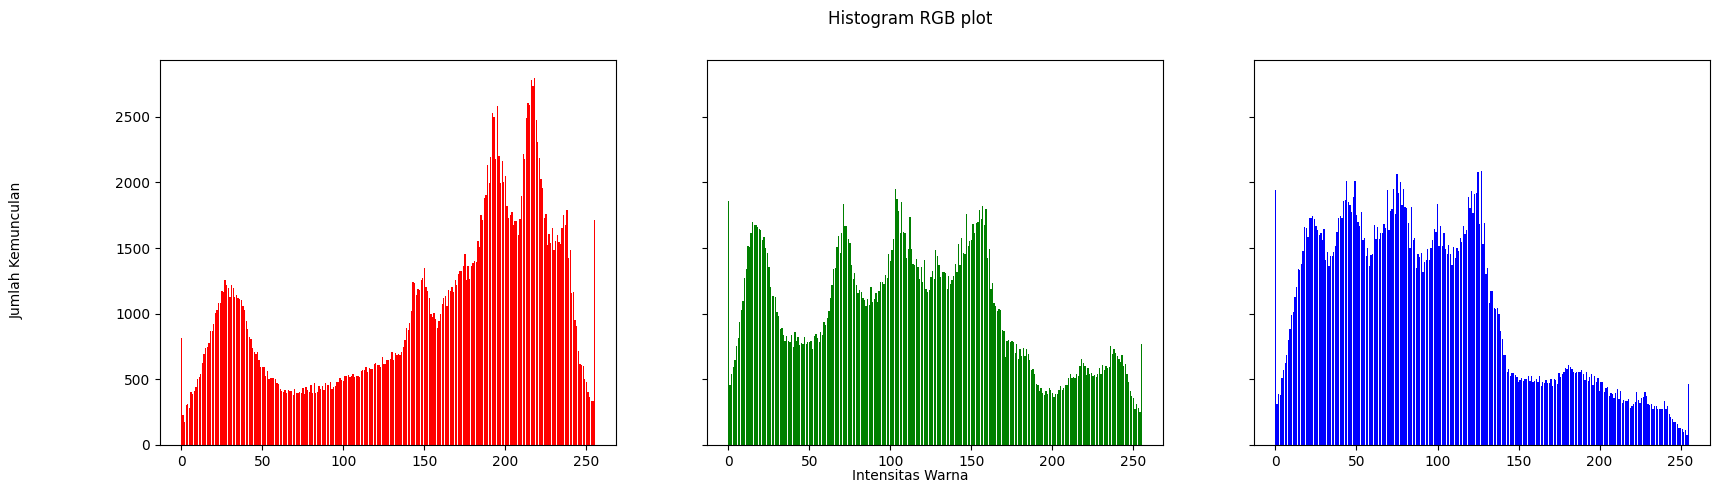

In [11]:
img_1 = cv.imread('/content/drive/MyDrive/Images/lena.jpg')
img_rgb = cv.cvtColor(img_1,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')

height, width, depth = np.shape(img_1)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img_1[y][x][0]] += 1
    green[img_1[y][x][1]] += 1
    red[img_1[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

4. After working on question no. 3, make the same image histogram but use the library
that is owned by NumPy, namely " histogram ". Compare the results. Does the
output appear the same?

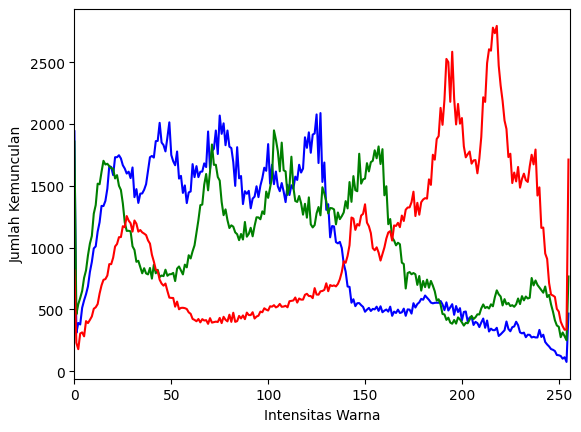

In [12]:
colors = ("b", "g", "r")
channel_ids = (0,1,2)

plt.xlim([0,256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        img_1[:,:, channel_id], bins=256, range=(0,256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")

plt.show()


5. Make an image histogram such as the output equalization histogram and also the
image display before and after the following equalization histogram process based on
the flowchart below : (Use image lena_lc .jpg)

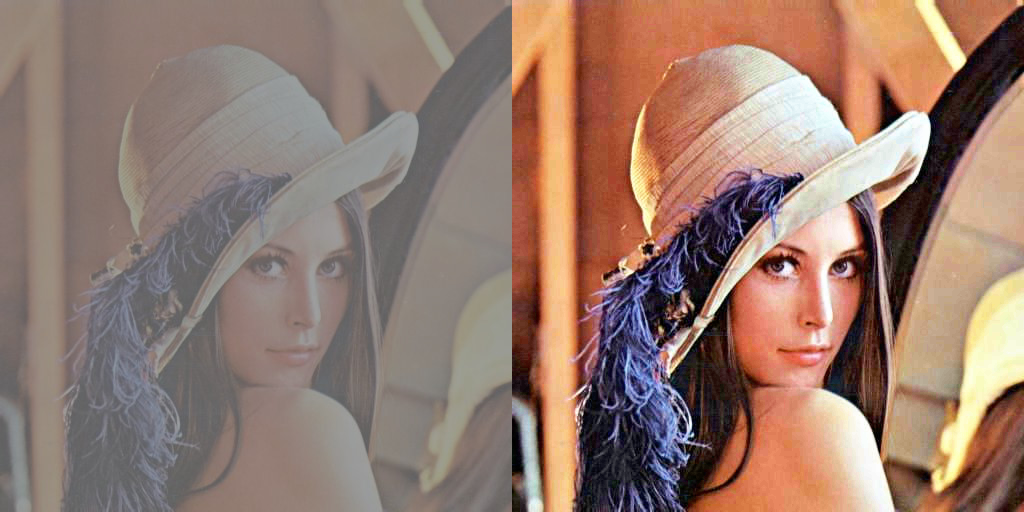

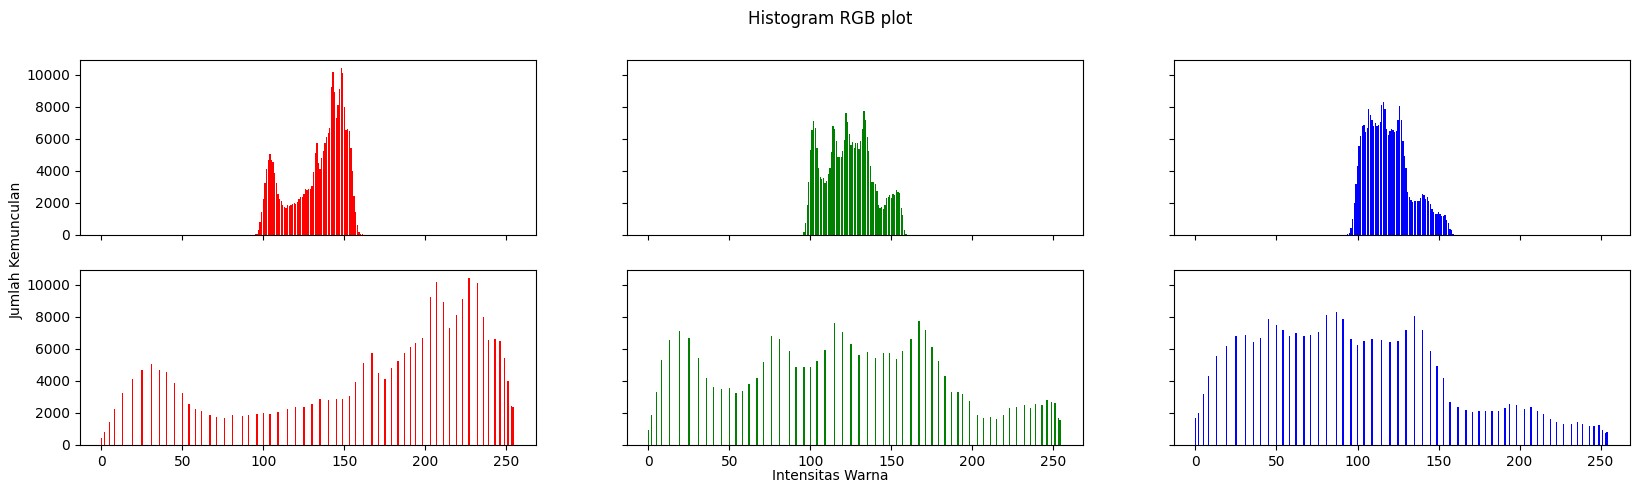

In [14]:
img1 = cv.imread('/content/drive/MyDrive/Images/lena_lc.jpg')
def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

histo_asli = histog(img1)

# Convert to Numpy array
img_array = np.asarray(img1)

# Flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

# Normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

# Normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

# Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

# Transformation
# Flatten image array into 10 list
img_list = list(img_array.flatten())

# Transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# Reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2)) # Concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')


6. After working on question no. 5, make the same image histogram but use the library
owned by CV2, namely " equalizeHist ". Compare the results. Does the output
appear the same?

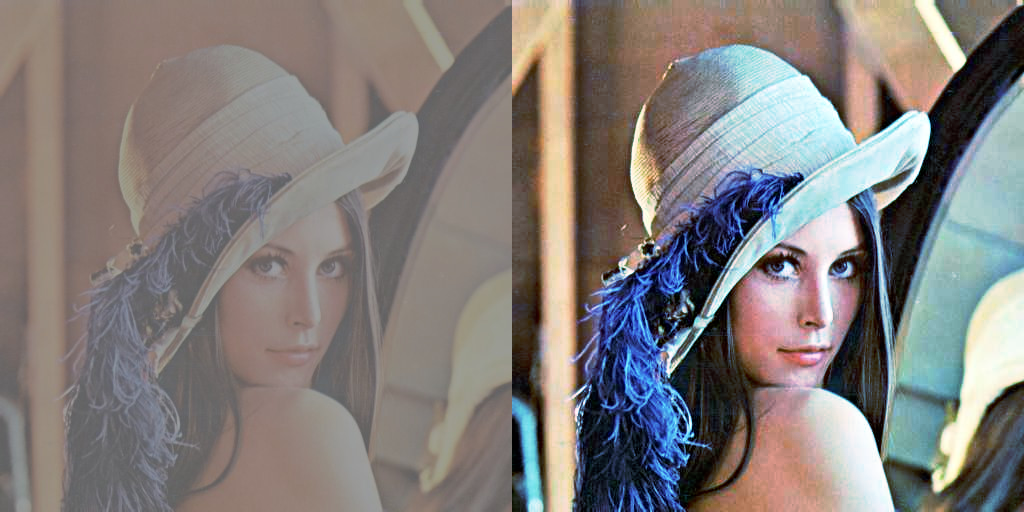

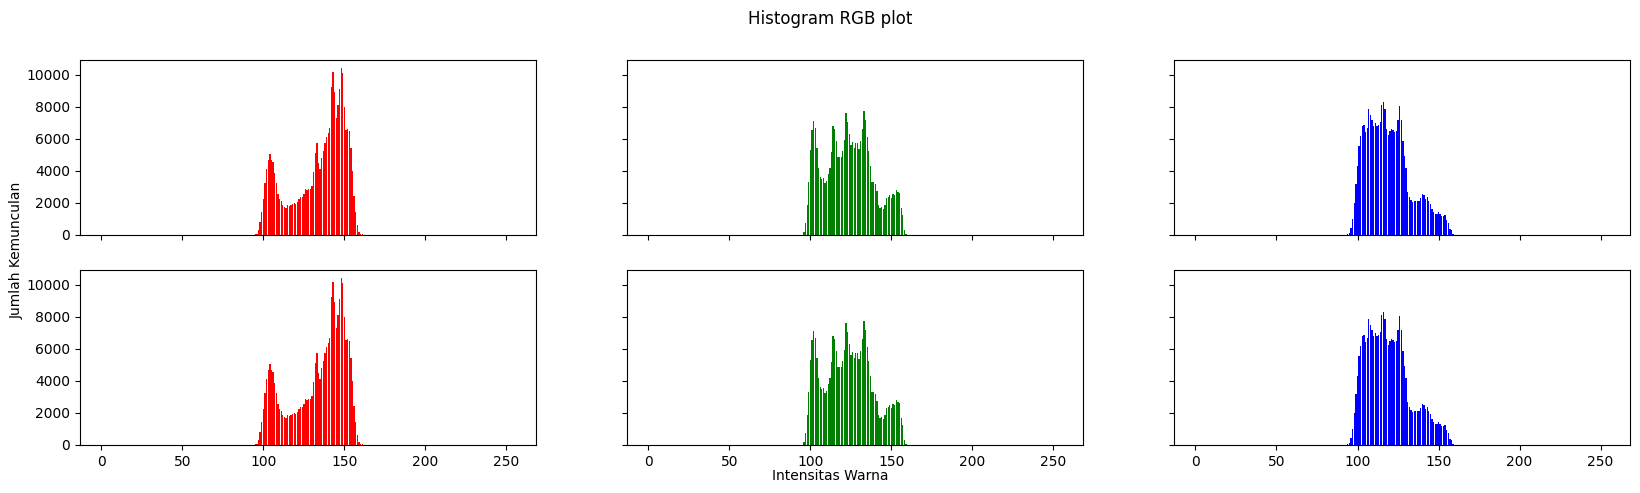

In [15]:
channels = cv.split(original)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img1, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

7. Do the mapping process of 16 million RGB colors into just 8 colors, namely black,
green, yellow, blue, cyan, magenta, white as shown in the following output based on
the flowchart below! (Use the image testlena .jpg)

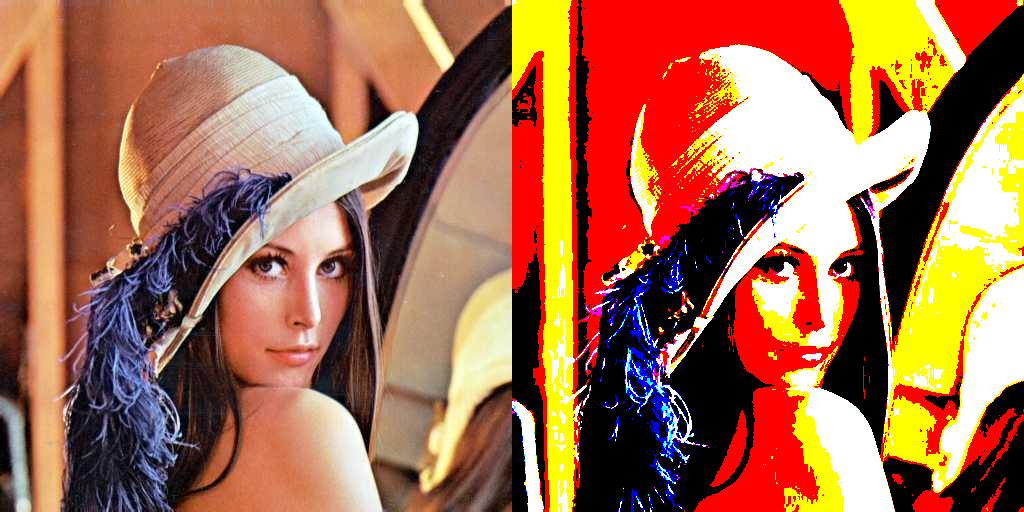

False

In [16]:
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/Images/testlena.jpg', img_8)

8. Do the Floyd and Steinberg dithering process like the following output (initial image
display, and after dithering display) based on the flowchart below! (Use wiki.jpg
image)

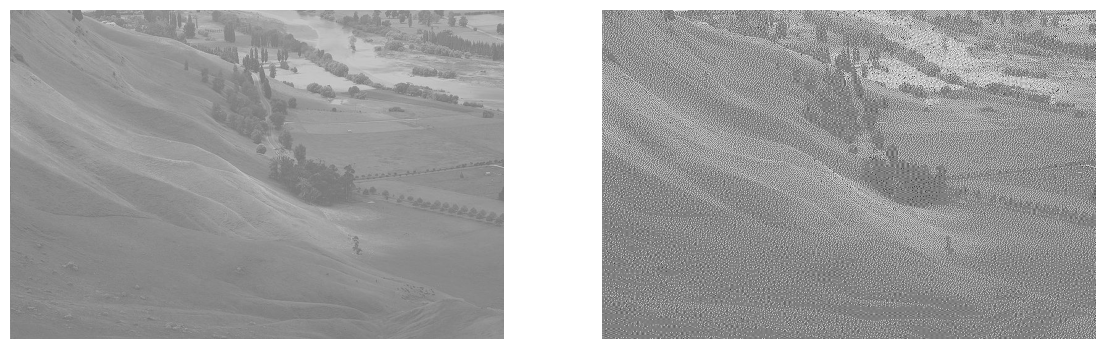

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/drive/MyDrive/Images/wiki.jpg')

# Display the original image
plt.figure(figsize=(14, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Perform Floyd-Steinberg dithering on each color channel separately
def floyd_steinberg_dithering_channel(image_channel):
    height, width = image_channel.shape
    new_channel = np.copy(image_channel)
    for y in range(height):
        for x in range(width):
            old_pixel = new_channel[y, x]
            new_pixel = 255 if old_pixel > 128 else 0
            error = old_pixel - new_pixel
            new_channel[y, x] = new_pixel
            if x < width - 1:
                new_channel[y, x + 1] += error * 7 / 16
            if x > 0 and y < height - 1:
                new_channel[y + 1, x - 1] += error * 3 / 16
            if y < height - 1:
                new_channel[y + 1, x] += error * 5 / 16
            if x < width - 1 and y < height - 1:
                new_channel[y + 1, x + 1] += error * 1 / 16
    return new_channel

# Split the image into color channels
b, g, r = cv2.split(img)

# Apply dithering to each color channel
dithered_b = floyd_steinberg_dithering_channel(b)
dithered_g = floyd_steinberg_dithering_channel(g)
dithered_r = floyd_steinberg_dithering_channel(r)

# Merge the dithered color channels back into a single image
dithered_img = cv2.merge((dithered_b, dithered_g, dithered_r))

# Display the dithered image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dithered_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()